In [58]:
import pandas as pd 
  
movies = pd.read_csv('/Users/Antoine/Desktop/CSProjects/ratings.csv')
movies.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [59]:
data = pd.read_csv('/Users/Antoine/Desktop/CSProjects/movies.csv')


In [60]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
data = pd.merge(df, movie_titles, on='item_id') 
data.head() 

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [62]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [63]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [64]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


/Users/antoine/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


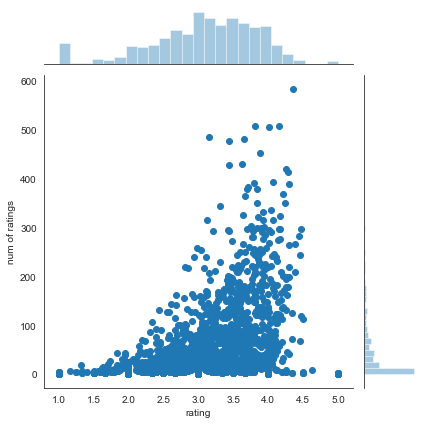

In [74]:
import seaborn as sns
sns.jointplot(x='rating', y='num of ratings', data=ratings)


In [67]:
movietitle = data.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
movietitle.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [68]:
first_user_ratings = movietitle['Fargo (1996)'] 
second_user_ratings = movietitle['GoodFellas (1990)'] 
  
first_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [69]:
similar_to_first = movietitle.corrwith(first_user_ratings) 
similar_to_second = movietitle.corrwith(second_user_ratings) 
  
corr_first = pd.DataFrame(similar_to_first, columns =['Correlation']) 
corr_first.dropna(inplace = True) 
  
corr_first.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [70]:
corr_first.sort_values('Correlation', ascending = False).head(10) 
corr_first = corr_first.join(ratings['num of ratings']) 
  
corr_first.head() 
  
corr_first[corr_first['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


In [75]:
corr_second = pd.DataFrame(similar_to_second, columns =['Correlation']) 
corr_second.dropna(inplace = True) 
  
corr_second = corr_second.join(ratings['num of ratings']) 
corr_second[corr_second['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
GoodFellas (1990),1.000000,226
Bonnie and Clyde (1967),0.617313,122
"Good, The Bad and The Ugly, The (1966)",0.599723,137
Tomorrow Never Dies (1997),0.547541,180
Beavis and Butt-head Do America (1996),0.528325,156
